In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_parquet('research/data/raw/data_v1.parquet')
forecast = pd.read_parquet('research/data/processed/data_v1_forecast.parquet')
forecast_v2 = pd.read_parquet('research/data/processed/data_v1_forecast_v2.parquet')
real = pd.read_parquet('research/data/raw/data_v1_real.parquet')

In [2]:
data.tail(4)

,quarter,quarter_label,ig_maus,ig_revenue,tk_maus,tk_revenue
17,2023-04-01,Q2 2023,2115000000,11775000000,1587000000,3667000000
18,2023-07-01,Q3 2023,2145000000,12736000000,1616000000,4241000000
19,2023-10-01,Q4 2023,2180000000,15322000000,1635000000,4997000000
20,2024-01-01,Q1 2024,2231000000,14472000000,1666000000,4583000000


In [3]:
forecast

,quarter,quarter_label,ig_maus,ig_revenue,tk_maus,tk_revenue
0,2024-03-31,Q2 2024,2221735781,12735807893,1871336709,4527462823
1,2024-06-30,Q3 2024,2242448858,12929389484,1631989456,3749413402
2,2024-09-30,Q4 2024,2276922459,13251575055,1576689951,3569650540
3,2024-12-31,Q1 2025,2369122780,14113266663,1495697320,3306366674


In [4]:
forecast_v2

,quarter,quarter_label,ig_maus,ig_revenue,tk_maus,tk_revenue
0,2024-03-31,Q2 2024,2221735781,14151546233,1871336709,5749225737
1,2024-06-30,Q3 2024,2242448858,16765018261,1631989456,6435724221
2,2024-09-30,Q4 2024,2276922459,20488542184,1576689951,7636252641
3,2024-12-31,Q1 2025,2369122780,20241305024,1495697320,5986963414


In [5]:
real

,quarter,quarter_label,ig_maus,ig_revenue,tk_maus,tk_revenue,model
0,2024-03-31,Q2 2024,2250000000,15638000000,1685000000,4856000000,real


In [6]:
# Adiciona a coluna de rótulo em cada DataFrame com uma nomenclatura mais apropriada
forecast['model'] = 'pred_v1'
forecast_v2['model'] = 'pred_v2'
real['model'] = 'real'          

In [7]:
# Selecionar o primeiro período de predição e os dados reais correspondentes
first_forecast = forecast.iloc[0]
second_forecast = forecast_v2.iloc[0]
real_data = real.iloc[0]

### Comparasion between prediction and real data 

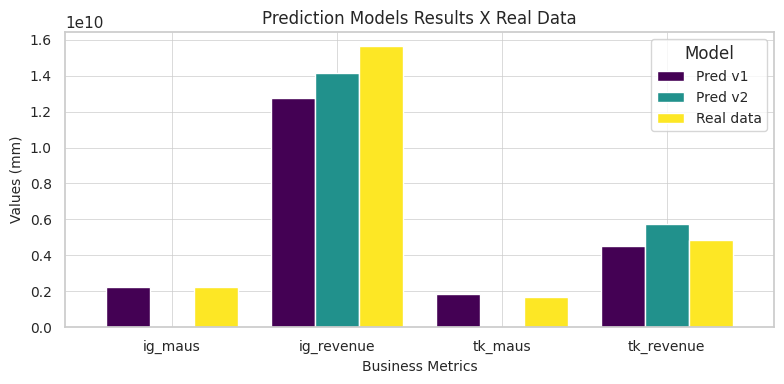

In [8]:
# Selecionar o primeiro período de predição e os dados reais correspondentes

# Criar uma paleta divergente
color = sns.color_palette("viridis", as_cmap=True)


# Configurar o estilo do Seaborn
sns.set(style="whitegrid")

# Criar um DataFrame para facilitar a plotagem
comparison_df = pd.DataFrame({
    'Metric': ['ig_maus', 'ig_revenue', 'tk_maus', 'tk_revenue'],
    'Pred v1': [first_forecast['ig_maus'], first_forecast['ig_revenue'], first_forecast['tk_maus'], first_forecast['tk_revenue']],
    'Pred v2': [None, second_forecast['ig_revenue'], None, second_forecast['tk_revenue']],
    'Real data': [real_data['ig_maus'], real_data['ig_revenue'], real_data['tk_maus'], real_data['tk_revenue']]
})

# Plotar o gráfico de barras
ax = comparison_df.set_index('Metric').plot(kind='bar', figsize=(8, 4), width=0.8, colormap=color)

# Remover notação científica no eixo Y
#ax.yaxis.set_major_formatter(mtick.ScalarFormatter())
#ax.ticklabel_format(style='plain', axis='y')  # Força formato plain (sem notação científica)

# Adicionar títulos e labels
plt.title('Prediction Models Results X Real Data', fontsize=12)
plt.ylabel('Values (mm)', fontsize=10)
plt.xlabel('Business Metrics', fontsize=10)

# Customizar a legenda
plt.legend(title='Model', fontsize=10)

# Ajustar ticks
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Ajustar o grid
plt.grid(axis='y', linewidth=0.5)
plt.grid(axis='x', linewidth=0.5)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


In [9]:
comp = pd.concat([forecast.head(1), forecast_v2.head(1), real.head(1)], ignore_index=True)
comp

,quarter,quarter_label,ig_maus,ig_revenue,tk_maus,tk_revenue,model
0,2024-03-31,Q2 2024,2221735781,12735807893,1871336709,4527462823,pred_v1
1,2024-03-31,Q2 2024,2221735781,14151546233,1871336709,5749225737,pred_v2
2,2024-03-31,Q2 2024,2250000000,15638000000,1685000000,4856000000,real


In [11]:
# Definindo a linha real como a última linha do DataFrame
real_values = comp.iloc[-1]

# Calculando a diferença percentual para cada previsão em relação aos valores reais
def calculate_percentage_error(prediction, actual):
    return ((prediction - actual) / actual) * 100

# Inicializando um dicionário para armazenar os resultados
results = []

# Iterando sobre as previsões
for index in range(len(comp) - 1):  # Exclui a última linha que contém os valores reais
    pred_row = comp.iloc[index]
    result = {
        'model': pred_row['model'],
        'ig_maus_error': calculate_percentage_error(pred_row['ig_maus'], real_values['ig_maus']),
        'ig_revenue_error': calculate_percentage_error(pred_row['ig_revenue'], real_values['ig_revenue']),
        'tk_maus_error': calculate_percentage_error(pred_row['tk_maus'], real_values['tk_maus']),
        'tk_revenue_error': calculate_percentage_error(pred_row['tk_revenue'], real_values['tk_revenue'])
    }
    results.append(result)

# Convertendo os resultados para um DataFrame
error_comp = pd.DataFrame(results)
error_comp


,model,ig_maus_error,ig_revenue_error,tk_maus_error,tk_revenue_error
0,pred_v1,-1.256188,-18.558589,11.058558,-6.765593
1,pred_v2,-1.256188,-9.505396,11.058558,18.394270
